**Автор: Анна Смелова**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

## Решение домашнего задания к уроку 1 “Алгоритм линейной регрессии. Градиентный спуск.”

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])
X.shape

(10, 2)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

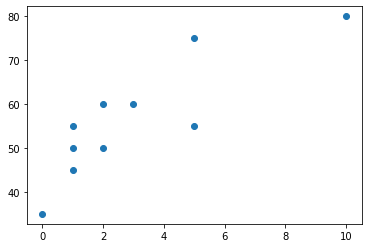

In [5]:
plt.scatter(X[:, 1], y)
plt.show()

### Задание 1
#### Подберите скорость обучения (eta) и количество итераций

In [6]:
n_1 = X.shape[1]

eta_1 = 1e-2
n_iter_1 = 250

W_1 = np.array([1, 0.5])
print(f'Number of objects = {n_1} \
       \nLearning rate = {eta_1} \
       \nInitial weights = {W_1} \
       \nNumber of iterations = {n_iter_1}\n')

for i in range(n_iter_1):
    y_pred_1 = np.dot(X, W_1)
    err_1 = calc_mse(y, y_pred_1)
    for k in range(W_1.shape[0]):
        W_1[k] -= eta_1 * (1/n_1 * 2 * X[:, k] @ (y_pred_1 - y))
    if i % 10 == 0:
        eta_1 /= 1.1
        print(f'Iteration #{i}: W_new = {W_1}, MSE = {round(err_1, 2)}')

Number of objects = 2        
Learning rate = 0.01        
Initial weights = [1.  0.5]        
Number of iterations = 250

Iteration #0: W_new = [ 6.4  19.35], MSE = 3047.75
Iteration #10: W_new = [18.77319138  8.6270072 ], MSE = 398.58
Iteration #20: W_new = [27.15289315  7.06014716], MSE = 207.1
Iteration #30: W_new = [32.4241672   6.10426679], MSE = 124.63
Iteration #40: W_new = [35.85213314  5.48265802], MSE = 86.53
Iteration #50: W_new = [38.15155609  5.06569312], MSE = 67.79
Iteration #60: W_new = [39.73790007  4.7780341 ], MSE = 58.04
Iteration #70: W_new = [40.86051023  4.57446606], MSE = 52.69
Iteration #80: W_new = [41.67349173  4.4270444 ], MSE = 49.62
Iteration #90: W_new = [42.2746909  4.3180262], MSE = 47.78
Iteration #100: W_new = [42.727794    4.23586294], MSE = 46.63
Iteration #110: W_new = [43.07521157  4.17286412], MSE = 45.89
Iteration #120: W_new = [43.34578807  4.12379924], MSE = 45.4
Iteration #130: W_new = [43.55952748  4.08504089], MSE = 45.06
Iteration #140: W

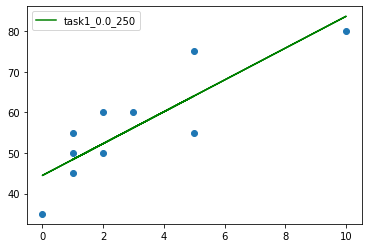

In [7]:
y_pred_grad_1 = X @ W_1
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad_1, label=f'task1_{round(eta_1,2)}_{n_iter_1}', c='g')
plt.legend()
plt.show()

### Задание 2*
#### В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [8]:
n_2 = X.shape[1]

eta_2 = 1e-2 
n_iter_2 = 100

W_2 = np.array([1, 0.5])
print(f'Number of objects = {n_2} \
       \nLearning rate = {eta_2} \
       \nInitial weights = {W_2} \n')

for i in range(n_iter_2):
    y_pred_2 = np.dot(X, W_2)
    err_2 = calc_mse(y, y_pred_2)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ - начало (заменила X на X.T)
    W_2 -= eta_2 * (1/n_2 * 2 * np.dot(X.T, (y_pred_2 - y)))
    # ИЗМЕНЕНИЯ - конец
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W_2}, MSE = {round(err_2,2)}')

Number of objects = 2        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.4  19.35], MSE = 3047.75
Iteration #10: W_new = [19.96966932  8.87179137], MSE = 379.6
Iteration #20: W_new = [29.27719328  6.70531799], MSE = 172.93
Iteration #30: W_new = [35.16120834  5.60976141], MSE = 94.66
Iteration #40: W_new = [38.85365942  4.93848587], MSE = 63.9
Iteration #50: W_new = [41.16920131  4.51849616], MSE = 51.81
Iteration #60: W_new = [42.62118483  4.25519525], MSE = 47.05
Iteration #70: W_new = [43.53165976  4.0900943 ], MSE = 45.18
Iteration #80: W_new = [44.10257814  3.98656703], MSE = 44.45
Iteration #90: W_new = [44.46057568  3.9216497 ], MSE = 44.16


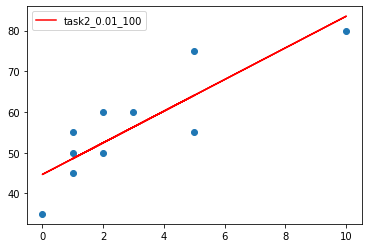

In [9]:
y_pred_grad_2 = X @ W_2
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad_2, label=f'task2_{round(eta_2,2)}_{n_iter_2}', c='r')
plt.legend()
plt.show()

### Задание 3*
#### Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.

In [10]:
n_3 = X.shape[1]

eta_3 = 1e-2 
eps_3 = 1e-8
n_iter_3 = 1e4

W_3 = np.array([1, 0.5])
print(f'Number of objects = {n_3} \
       \nLearning rate = {eta_3} \
       \nInitial weights = {W_3} \n')

weight_dist_3 = np.inf
i = 0
while weight_dist_3 > eps_3 and i < n_iter_3:
    y_pred_3 = np.dot(X, W_3)
    err_3 = calc_mse(y, y_pred_3)
    new_W_3 = W_3 - eta_3 * (1/n_3 * 2 * np.dot(X.T, (y_pred_3 - y)))
    weight_dist_3 = np.linalg.norm(new_W_3 - W_3, ord=2)
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {new_W_3}, MSE = {round(err_3,2)}')
    i += 1
    W_3 = new_W_3
print(f'Количество итераций {i}, изменение весов {weight_dist_3}')

Number of objects = 2        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.4  19.35], MSE = 3047.75
Iteration #10: W_new = [19.96966932  8.87179137], MSE = 379.6
Iteration #20: W_new = [29.27719328  6.70531799], MSE = 172.93
Iteration #30: W_new = [35.16120834  5.60976141], MSE = 94.66
Iteration #40: W_new = [38.85365942  4.93848587], MSE = 63.9
Iteration #50: W_new = [41.16920131  4.51849616], MSE = 51.81
Iteration #60: W_new = [42.62118483  4.25519525], MSE = 47.05
Iteration #70: W_new = [43.53165976  4.0900943 ], MSE = 45.18
Iteration #80: W_new = [44.10257814  3.98656703], MSE = 44.45
Iteration #90: W_new = [44.46057568  3.9216497 ], MSE = 44.16
Iteration #100: W_new = [44.68506002  3.88094292], MSE = 44.04
Iteration #110: W_new = [44.82582417  3.85541751], MSE = 44.0
Iteration #120: W_new = [44.91409111  3.83941166], MSE = 43.98
Iteration #130: W_new = [44.96943938  3.82937511], MSE = 43.97
Iteration #140: W_new = [45.00414582  3.82308163], 

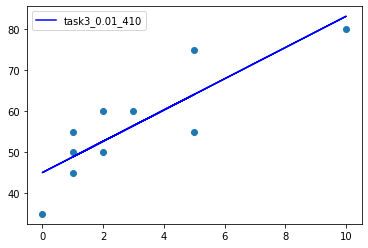

In [11]:
y_pred_grad_3 = X @ W_3
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad_3, label=f'task3_{round(eta_3,2)}_{i}', c='b')
plt.legend()
plt.show()